## Linear regression with one variable

Consider the data set $(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})$, where $x$ is the independent variable and $y$ is the dependent variable. We will model this data set as follows:

\begin{equation}
f(x) = \alpha + \beta x.
\end{equation}

What are the values of $\alpha$ and $\beta$ that provide the best fit to the data set? To answer this question, we minimize the sum of squared errors:

\begin{align*}
J(\alpha, \beta) &= \frac{1}{2m}\sum_{i=1}^N (f(x^{(i)}) - y^{(i)})^2 \\
                 &= \frac{1}{2m}\sum_{i=1}^N (\alpha + \beta x^{(i)} - y^{(i)})^2.
\end{align*}

$J(\alpha, \beta)$ is called the *cost function*, or *objective function*. Let's minimize the cost function with respect to $\alpha$ and $\beta$. We will denote the optimal values by $\hat{\beta}$ and $\hat{\alpha}$:

\begin{align*}
\frac{\partial J}{\partial\alpha} = 0 &\to \frac{1}{m}\sum_{i=1}^m (\hat{\alpha} + \hat{\beta}x^{(i)} - y^{(i)}) = 0 \\
\frac{\partial J}{\partial\beta}  = 0 &\to \frac{1}{m}\sum_{i=1}^m (\hat{\alpha} + \hat{\beta}x^{(i)} - y^{(i)})x^{(i)} = 0.
\end{align*}

Consider the following definitions:

\begin{equation}
\bar{x} = \frac{1}{m}\sum_{i=1}^m x^{(i)} ,\qquad
\bar{y} = \frac{1}{m}\sum_{i=1}^m y^{(i)} ,\qquad
S_x^2   = \frac{1}{m}\sum_{i=1}^m (x^{(i)} - \bar{x})^2 ,\qquad
C_{xy}  = \frac{1}{m}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \bar{y}).
\end{equation}

These quantities should be familiar: $\bar{x}$ is the sample mean of $x$, $\bar{y}$ is the sample mean of $y$, $S_x^2$ is the (biased) sample variance of $x$, and $C_{xy}$ is the (biased) sample covariance of $x$ and $y$. Using these definitions, it can be shown after straightforward algebra that

\begin{equation}
\hat{\beta} = \frac{C_{xy}}{S_x^2}, \qquad
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}.
\end{equation}

## Linear regression with `statsmodels`

Below we will create a fake dataset, run linear regression on it using `statsmodels`, and try to reproduce the various outputs.

In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn

Generate data using the model $f(x)=0.3 + 2x$ and Gaussian noise with $\sigma=0.5$: 

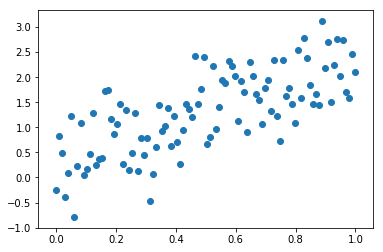

In [2]:
# Make results reproducible
np.random.seed(123)

m = 100
x = np.linspace(0, 1, m)
y = np.random.normal(loc=2.0*x+0.3, scale=0.5, size=m)
plt.scatter(x, y);

Run regression using `statsmodels`:

In [3]:
model = regression.linear_model.OLS(y, np.column_stack([np.ones(len(x)), x])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           2.63e-17
Time:                        16:42:42   Log-Likelihood:                -84.642
No. Observations:                 100   AIC:                             173.3
Df Residuals:                      98   BIC:                             178.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3065      0.113      2.710      0.008       0.082       0.531
x1             2.0140      0.195     10.306      0.000       1.626       2.402
==============================================================================
Omnibus:                        2.753   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.746
Skew:                           0.035   Prob(JB):                        0.418
Kurtosis:                       2.356   Cond. No.                         4.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Optimal parameters

Let's see if the formulas we derived for $\hat{\beta}$ and $\hat{\alpha}$ match the output of `statsmodels`:

In [4]:
xmean = np.mean(x)
xvar = np.var(x)
ymean = np.mean(y)

beta = np.cov(x, y, bias=True)[0, 1] / xvar
alpha = ymean - beta * xmean
print("statsmodels Alpha = {}".format(model.params[0]))
print("Reproduced  Alpha = {}".format(alpha))
print("")
print("statsmodels Beta  = {}".format(model.params[1]))
print("Reproduced  Beta  = {}".format(beta))

statsmodels Alpha = 0.306537621742
Reproduced  Alpha = 0.306537621742

statsmodels Beta  = 2.01403383001
Reproduced  Beta  = 2.01403383001


Note that the best estimates $\hat{\beta}$ and $\hat{\alpha}$ are quite close to the actual model parameters $\beta=2$ and $\alpha=0.3$.

## R-squared

R-squared (usually denoted $R^2$) is defined as 

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^m(y^{(i)} - f^{(i)})^2}{\sum_{i=1}^m(y^{(i)} - \bar{y})^2},
\end{equation}

where $f(x)$ is any model of the data and $f^{(i)} = f(x^{(i)})$. R-squared compares the error in prediction (or *residual*) $y^{(i)} - f^{(i)}$ to that of the trivial model $f=\bar{y}$. The smaller the residual, the closer $R^2$ is to $1$. In that sense, it measures the proportion of variance in the dependent variable $y$ that is predictable from the independent variable $x$ using the model $f$. Note, however, that this is an *in-sample* measure of goodness-of-fit, if the same dataset is used to fit the parameters of the model *and* compute $R^2$.

Let's confirm $R^2$ for our linear regression model above:

In [5]:
f = alpha + beta * x
e = y - f
rsquared = 1 - np.dot(e, e) / np.dot(y - ymean, y - ymean)
print("statsmodels R-squared = {}".format(model.rsquared))
print("Reproduced  R-squared = {}".format(rsquared))

statsmodels R-squared = 0.520089566727
Reproduced  R-squared = 0.520089566727


When the model $f$ is linear regression with an intercept term, $R^2$ is equal to the square of the sample correlation between $f$ and $y$. Let's check this:

In [6]:
np.corrcoef(f, y)[0, 1]**2

0.5200895667266312

Indeed! Let's prove this.

Consider the following definitions:

\begin{equation}
S_y^2   = \frac{1}{m}\sum_{i=1}^m (y^{(i)} - \bar{y})^2 ,\qquad
r_{xy}  = \frac{C_{xy}}{S_xS_y},
\end{equation}

where $S_y$ is the (biased) sample variance of $y$ and $r_{xy}$ is the sample correlation coefficient of $x$ and $y$. Using this, we can express $\hat{\beta}$ as follows:

\begin{equation}
\hat{\beta} = \frac{r_{xy}S_y}{S_x}.
\end{equation}

Also note that:

\begin{equation}
f^{(i)} - \bar{y} = \hat{\alpha} + \hat{\beta}x^{(i)} - \bar{y} = \hat{\beta}(x^{(i)}-\bar{x}),
\end{equation}

where the second equality follows from $\hat{\alpha}=\bar{y} - \hat{\beta}\bar{x}$. The average of squared residuals can be written as:

\begin{align*}
\frac{1}{m}\sum_{i=1}^m(f^{(i)} - y^{(i)})^2
&= \frac{1}{m}\sum_{i=1}^m[(f^{(i)} - \bar{y}) - (y^{(i)} - \bar{y}) ]^2 \\
&= \frac{1}{m}\sum_{i=1}^m(f^{(i)} - \bar{y})^2 + \frac{1}{m}\sum_{i=1}^m(y^{(i)} - \bar{y})^2 - \frac{2}{m}\sum_{i=1}^m(f^{(i)} - \bar{y})(y^{(i)} - \bar{y}) \\
&= \frac{\hat{\beta}^2}{m}\sum_{i=1}^m(x^{(i)} - \bar{x})^2 + S_y^2 - \frac{\hat{\beta}}{m}\sum_{i=1}^m(x^{(i)} - \bar{x})(y^{(i)} - \bar{y}) \\
&= \hat{\beta}^2 S_x^2 + S_y^2 - 2\hat{\beta}C_{xy} \\
&= S_y^2(1 - r_{xy}^2),
\end{align*}

where the third equality follows from $f^{(i)} - \bar{y} = \hat{\beta}(x^{(i)}-\bar{x})$, and the last one from substituting the value of $\hat{\beta}$.

Finally:

\begin{align*}
R^2 &= 1 - \frac{\frac{1}{m}\sum_{i=1}^m(y^{(i)} - f^{(i)})^2}{\frac{1}{m}\sum_{i=1}^m(y^{(i)} - \bar{y})^2} \\
    &= 1 - \frac{S_y^2(1 - r_{xy}^2)}{S_y^2} \\
    &= r_{xy}^2.
\end{align*}

We proved that $R^2$ is given by the square of the sample correlation between $x$ and $y$, and not $f$ and $y$ as originally promised! First, let's numerically check what we just proved:

In [7]:
np.corrcoef(x, y)[0, 1]**2

0.5200895667266315

Good! Now let's do the extra work and show that $r_{fy}^2 = r_{xy}^2$.

To do this, we'll need one more result:

\begin{equation}
\bar{f}
    = \frac{1}{m}\sum_{i=1}^m f^{(i)}
    = \frac{1}{m}\sum_{i=1}^m (\hat{\alpha} + \hat{\beta}x^{(i)})
    = \hat{\alpha} + \hat{\beta}\bar{x}
    = \bar{y},
\end{equation}
where the last line follows from $\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$.

Now we're ready:

\begin{align*}
r_{fy}
&= \frac{\sum_{i=1}^m (f^{(i)} - \bar{f})(y^{(i)} - \bar{y})}{\sqrt{\sum_{i=1}^m (f^{(i)} - \bar{f})^2}\sqrt{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}} \\
&= \frac{\sum_{i=1}^m (f^{(i)} - \bar{y})(y^{(i)} - \bar{y})}{\sqrt{\sum_{i=1}^m (f^{(i)} - \bar{y})^2}\sqrt{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}} \\
&= \frac{\hat{\beta}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}{\sqrt{\hat{\beta}^2\sum_{i=1}^m (x^{(i)} - \bar{x})^2}\sqrt{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}} \\
&= \frac{\hat{\beta}}{|\hat{\beta}|}r_{xy},
\end{align*}

where the second equality follows from $\bar{f}=\bar{y}$ and the third equality follows from $f^{(i)} - \bar{y} = \hat{\beta}(x^{(i)}-\bar{x})$. There we have it:

\begin{equation}
R^2 = r_{fy}^2 = r_{xy}^2.
\end{equation}

## Probabilistic view

In most realistic cases, we cannot hope to explain all variability in $y$ using only $x$. This is also true for models which are more complex than linear regression. We should always expect a certain degree of randomness that our models cannot account for. However, we can hope to design models that make the correct predictions *on average*. This suggests a probabilistic approach for modelling. We can think about $y$ as a random variable with a certain probability distribution, whose mean is given by the model $f(x)$.

For simplicity, let's assume $y^{(i)}$ are independent normally-distributed samples with standard deviation $\sigma$: 

\begin{equation}
y^{(i)} \sim \mathcal{N}(\alpha + \beta x^{(i)}, \sigma^2)
\end{equation}

The probabiliy of observing $(x^{(i)}, y^{(i)})$ is

\begin{equation}
P^{(i)} = \frac{1}{\sqrt{2\pi \sigma^2}}\exp{\left[-\frac{(y^{(i)} - \alpha - \beta x^{(i)})^2}{2\sigma^2}\right]}.
\end{equation}

Since we're assuming all observations are independent, the probability of observing the whole dataset $(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})$ is

\begin{equation}
P = \Pi_{i=1}^m P^{(i)} = \frac{1}{(2\pi \sigma^2)^{m/2}}\exp{\left[-\sum_{i=1}^m\frac{(y^{(i)} - \alpha - \beta x^{(i)})^2}{2\sigma^2}\right]} = \frac{1}{(2\pi \sigma^2)^{m/2}}\exp{\left(-\frac{mJ(\alpha, \beta)}{\sigma^2}\right)},
\end{equation}

where $J$ is the cost function defined earlier. This is interesting! The probability of observing the data set can be expressed in terms of the cost function. In fact, the parameters $\alpha$ and $\beta$ that minimize $J$ also maximize $P$. Picking the parameters of a model to maximize the probability of observing the dataset is called *maximum likelihood estimation*.

*Log-likelihood* is given by $\log P$, which in our case is given by:

\begin{equation}
\log P(\alpha, \beta, \sigma^2) = -\frac{m}{2}\log(2\pi\sigma^2)-\frac{1}{2\sigma^2}\sum_{i=1}^m(y^{(i)} - \alpha - \beta x^{(i)})^2.
\end{equation}

In the model summary above from `statsmodels`, a number is quoted for Log-Likelihood. To reproduce it, let's compute $\log P(\hat{\alpha}, \hat{\beta}, \sigma^2)$. One thing, though, is that $\log P$ depends on $\sigma$, which `statsmodels` doesn't take as input. It can, however, esimate it from the sample standard deviation of the prediction errors $y^{(1)} - f^{(1)}, \dots, y^{(m)} - f^{(m)}$. Let's give that a go:

In [8]:
loglikelihood = -(len(x)/2.0)*np.log(2*np.pi*np.var(e)) - m/2.0
print("statsmodels Log-Likelihood = {}".format(model.llf))
print("Reproduced  Log-Likelihood = {}".format(loglikelihood))

statsmodels Log-Likelihood = -84.6424357588
Reproduced  Log-Likelihood = -84.6424357588


Indeed!

## Error of estimates

Given the probabilistic view, we now see that the optimal estimates $\hat{\alpha}$ and $\hat{\beta}$ should be regarded as random variables, and not confused with the "real" underlying parameters $\alpha$ and $\beta$. A different dataset, for instance, would result in different values for $\hat{\alpha}$ and $\hat{\beta}$. Therefore, it's important to study their variability.

Let's first check their means. Note that by assumption

\begin{equation}
\mathbb{E}[y^{(i)}] = \alpha + \beta x^{(i)},
\end{equation}

and as a result

\begin{align*}
\mathbb{E}[\bar{y}]
    &= \frac{1}{m} \sum_{i=1}^m \mathbb{E}[y^{(i)}] \\
    &= \frac{1}{m} \sum_{i=1}^m (\alpha + \beta x^{(i)}) \\
    &= \alpha + \beta \bar{x}.
\end{align*}

Combining these:

\begin{equation}
\mathbb{E}[y^{(i)} - \bar{y}] = \beta (x^{(i)} - \bar{x}).
\end{equation}

Given these results, we can compute the mean of $\hat{\beta}$:

\begin{align*}
\mathbb{E}[\hat{\beta}]
    &= \frac{1}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})\mathbb{E}[y^{(i)} - \bar{y}] \\
    &= \frac{\beta}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})(x^{(i)} - \bar{x}) \\
    &= \beta,
\end{align*}

and also that of $\hat{\alpha}$:

\begin{align*}
\mathbb{E}[\hat{\alpha}]
    &= \mathbb{E}[\bar{y}] - \mathbb{E}[\hat{\beta}] \bar{x} \\
    &= \alpha + \beta \bar{x} - \beta \bar{x} \\
    &= \alpha.
\end{align*}

So the mean of $\hat{\beta}$ and $\hat{\alpha}$ are $\beta$ and $\alpha$, respectively. Good, but no terribly surprising!

Let's compute the variance of $\hat{\beta}$. First, we will express $\hat{\beta} - \beta$ in a convenient way:

\begin{align*}
\hat{\beta} - \beta
    &= \frac{1}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \bar{y}) - \frac{\beta}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})^2 \\
    &= \frac{1}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})[(y^{(i)} - \beta x^{(i)} - \alpha) - (\bar{y} - \beta \bar{x} - \alpha)] \\
    &= \frac{1}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \mathbb{E}[y^{(i)}]) - \frac{\bar{y} - \beta \bar{x} - \alpha}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x}) \\
    &= \frac{1}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \mathbb{E}[y^{(i)}])
\end{align*}

where the first equality follows from the definition of $S_x^2$, the second from $\mathbb{E}[y^{(i)}] = \alpha + \beta x^{(i)}$, and the third from $\sum_{i=1}^m (x^{(i)} - \bar{x})=0$. Then:

\begin{align*}
\text{Var}[\hat{\beta}]
    &= \mathbb{E}[(\hat{\beta} - \beta)^2] \\
    &= \frac{1}{m^2S_x^4}\sum_{i,j=1}^m (x^{(i)} - \bar{x})(x^{(j)} - \bar{x})\mathbb{E}[(y^{(i)} - \mathbb{E}[y^{(i)}]) (y^{(j)} - \mathbb{E}[y^{(j)}])] \\
    &= \frac{1}{m^2S_x^4}\sum_{i,j=1}^m (x^{(i)} - \bar{x})(x^{(j)} - \bar{x})\text{Cov}[y^{(i)}, y^{(j)}] \\
    &= \frac{1}{m^2S_x^4}\sum_{i,j=1}^m (x^{(i)} - \bar{x})(x^{(j)} - \bar{x})\sigma^2\delta_{ij} \\
    &= \frac{\sigma^2}{m^2S_x^4}\sum_{i}^m (x^{(i)} - \bar{x})^2 \\
    &= \frac{\sigma^2}{mS_x^2},
\end{align*}

where the second equality follows from the fact that $y^{(1)}, \dots, y^{(m)}$ are (by assumption) independent and normally distributed with variance $\sigma^2$, i.e $\text{Cov}[y^{(i)}, y^{(j)}] = \sigma^2\delta_{ij}$.

Let's check this against `statsmodels`. The estimated value of $\sigma^2$ (since the real value is unknown to `statsmodels`), is stored in the `scale` attribute of `model`. Using that, we can reproduce the standard error of $\hat{\beta}$: 

In [9]:
beta_se = np.sqrt(model.scale / (m * xvar))
print("statsmodels Beta std err = {}".format(model.bse[1]))
print("Reproduced  Beta std err = {}".format(beta_se))

statsmodels Beta std err = 0.195431582311
Reproduced  Beta std err = 0.195431582311


Let's also compute the variance of $\hat{\alpha}$. First, note that we can express $\hat{\alpha} - \alpha$ as:

\begin{align*}
\hat{\alpha} - \alpha
    &= \bar{y} - (\hat{\beta} - \beta)\bar{x} - \beta\bar{x} - \alpha \\
    &= (\bar{y} - (\beta\bar{x} + \alpha)) - (\hat{\beta} - \beta)\bar{x} \\
    &= (\bar{y} - \mathbb{E}[\bar{y}]) - (\hat{\beta} - \beta)\bar{x}.
\end{align*}

To compute the variance of $\hat{\alpha}$, we will need the covariance between $\hat{\beta}$ and $\bar{y}$. We can express $\bar{y} - \mathbb{E}[\bar{y}]$ as

\begin{align*}
\bar{y} - \mathbb{E}[\bar{y}]
    &= \bar{y} - \beta \bar{x} - \alpha \\
    &= \frac{1}{m}\sum_{j=1}^m (y^{(j)} - \beta x^{(j)} - \alpha) \\
    &= \frac{1}{m}\sum_{j=1}^m (y^{(j)} - \mathbb{E}[y^{(j)}]),
\end{align*}

from which it follows that

\begin{align*}
\text{Cov}[\hat{\beta}, \bar{y}]
    &= \mathbb{E}\left[(\hat{\beta} - \beta) (\bar{y} - \mathbb{E}[\bar{y}])\right] \\
    &= \frac{1}{m S_x^2}\sum_{i,j=1}^m (x^{(i)} - \bar{x}) \mathbb{E}\left[(y^{(i)} - \mathbb{E}[y^{(i)}]) (y^{(j)} - \mathbb{E}[y^{(j)}])\right] \\
    &= \frac{1}{m S_x^2}\sum_{i,j=1}^m (x^{(i)} - \bar{x}) \text{Cov}[y^{(i)}, y^{(j)}] \\
    &= \frac{1}{m S_x^2}\sum_{i,j=1}^m (x^{(i)} - \bar{x}) \sigma^2\delta_{ij} \\
    &= \frac{\sigma^2}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x}) \\
    &= 0.
\end{align*}

Also:

\begin{align*}
\text{Var}[\bar{y}]
    &= \mathbb{E}\left[(\bar{y} - \mathbb{E}[\bar{y}])^2\right] \\
    &= \frac{1}{m^2}\sum_{k,l=1}^m \text{Cov}[y^{(k)}, y^{(l)}] \\
    &= \frac{1}{m^2}\sum_{k,l=1}^m \sigma^2\delta_{kl} \\
    &= \frac{\sigma^2}{m}.
\end{align*}

This is exactly what we should've expected without doing any work, since $\bar{y} - \mathbb{E}[\bar{y}] \sim \mathcal{N}(0, \sigma^2/m)$ follows from the fact that $\bar{y}$ is an average of independent and identical normally distributed random variables.

Now we can compute the variance of $\hat{\alpha}$:

\begin{align*}
\text{Var}[\hat{\alpha}]
    &= \mathbb{E}\left[(\hat{\alpha} - \alpha)^2\right] \\
    &= \text{Var}[\bar{y}] + \bar{x}^2 \text{Var}[\hat{\beta}] - 2\bar{x}\text{Cov}[\hat{\beta}, \bar{y}] \\
    &= \frac{\sigma^2}{m} + \bar{x}^2\frac{\sigma^2}{mS_x^2} - 0 \\
    &= \frac{\sigma^2}{m}(1+\bar{x}^2/S_x^2).
\end{align*}

Let's check this against `statsmodels`:

In [10]:
alpha_se = np.sqrt(model.scale / m * (1 + xmean**2/xvar))
print("statsmodels Alpha std err = {}".format(model.bse[0]))
print("Reproduced  Alpha std err = {}".format(alpha_se))

statsmodels Alpha std err = 0.113117048297
Reproduced  Alpha std err = 0.113117048297


Our calculation above also makes it easy to derive the covariance between $\hat{\alpha}$ and $\hat{\beta}$:

\begin{align*}
\text{Cov}[\hat{\alpha}, \hat{\beta}]
    &= \mathbb{E}[(\hat{\alpha} - \alpha)(\hat{\beta} - \beta)] \\
    &= \text{Cov}[\hat{\beta}, \bar{y}] - \text{Var}[\hat{\beta}] \\
    &= 0 - \bar{x} \frac{\sigma^2}{mS_x^2} \\
    &= -\frac{\sigma^2\bar{x}}{mS_x^2}.
\end{align*}

Again, we get the same number as `statsmodels`:

In [11]:
cov_params = - model.scale * xmean/(m*xvar)
print("statsmodels alpha-beta covariance = {}".format(model.cov_params()[0, 1]))
print("Reproduced  alpha-beta covariance = {}".format(cov_params))

statsmodels alpha-beta covariance = -0.0190967516823
Reproduced  alpha-beta covariance = -0.0190967516823


One detail we glossed over was how `statsmodels` estimates $\sigma^2$. Let's think about this a little. Since, by assumption, $y{(i)} \sim \mathcal{N}(\alpha + \beta x^{(i)}, \sigma^2)$, it makes sense to use the sample variance of the prediction error $e_i=y^{(i)} - \hat{\alpha} - \hat{\beta} x^{(i)}=y^{(i)} - f^{(i)}$ as an estimate. We can express $e_i$ as follows:

\begin{align*}
e_i &= y^{(i)} - \hat{\alpha} - \hat{\beta} x^{(i)} \\
    &= (y^{(i)} - \mathbb{E}[y^{(i)}]) - (\hat{\alpha} - \alpha) - (\hat{\beta} - \beta)x^{(i)} \\
    &= (y^{(i)} - \mathbb{E}[y^{(i)}]) - (\bar{y} - \mathbb{E}[\bar{y}]) - (\hat{\beta} - \beta)(x^{(i)} - \bar{x}) \\
    &= \sum_{j=1}^{m}(y^{(j)} - \mathbb{E}[y^{(j)}])\left[\delta_{ij} - \frac{1}{m} - \frac{1}{m S_x^2}(x^{(i)} - \bar{x})(x^{(j)} - \bar{x}) \right] \\
    &= \sum_{j=1}^{m}A_{ij}(y^{(j)} - \mathbb{E}[y^{(j)}]),
\end{align*}

where the second equality follows from $\langle y^{(i)} \rangle = \alpha + \beta x^{(i)}$, the third from $\hat{\alpha} - \alpha = (\bar{y} - \langle \bar{y} \rangle) - (\hat{\beta} - \beta)\bar{x}$, the fourth from our earlier expressions for $\bar{y} - \langle \bar{y} \rangle$ and $\hat{\beta} - \beta$, and in the last equality we have introduced the matrix $A$ whose elements are given by:

\begin{equation}
A_{ij} \equiv \delta_{ij} - \frac{1}{m} - \frac{1}{m S_x^2}(x^{(i)} - \bar{x})(x^{(j)} - \bar{x}).
\end{equation}

$A$ has a few interesting properties. First, it's symmetric: $A_{ij} = A_{ij}$. Second, it's equal to its square: $A^2=A$. (This can be shown by carrying out the matrix multiplication between $A$ and itself. It's a bit tedious and not terribly interesting, so I'll leave it out.) Using these results, we can compute the sum of squared errors:

\begin{align*}
\sum_{i=1}^{m} e_i^2
    &= \sum_{i=1}^{m}\left[\sum_{j=1}^{m}A_{ij}(y^{(j)} - \mathbb{E}[y^{(j)}])\right]^2 \\
    &= \sum_{j,k=1}^{m}(y^{(j)} - \mathbb{E}[y^{(j)}])(y^{(k)} - \mathbb{E}[y^{(k)}])\left[\sum_{i=1}^{m}A_{ij}A_{ik}\right] \\
    &= \sum_{j,k=1}^{m}(y^{(j)} - \mathbb{E}[y^{(j)}])(y^{(k)} - \mathbb{E}[y^{(k)}]) A_{jk},
\end{align*}

where the last equality follows from the fact that $A$ is symmetric and $A^2=A$. Taking the expectation value of both sides:

\begin{align*}
\mathbb{E}\left[\sum_{i=1}^{m} e_i^2 \right]
    &= \sum_{j,k=1}^{m} A_{jk}\mathbb{E}\left[(y^{(j)} - \mathbb{E}[y^{(j)}])(y^{(k)} - \mathbb{E}[y^{(k)}])\right] \\
    &= \sum_{j,k=1}^{m} A_{jk}\text{Cov}[y^{(j)}, y^{(k)}] \\
    &= \sum_{j,k=1}^{m} A_{jk}\sigma^2\delta_{ij} \\
    &= \sigma^2 \text{tr}(A),
\end{align*}

where $\text{tr}(A)=\sum_{i=1}^{m}A_{ii}$ denotes the trace of $A$. It's easy to show that $\text{tr}(A)=m-2$, so the unbiased estimator $\hat{\sigma}^2$ of $\sigma^2$ is:

\begin{align*}
\hat{\sigma}^2
    &= \frac{1}{m-2}\sum_{i=1}^{m}e_i^2 \\
    &= \frac{1}{m-2}\sum_{i=1}^m(y^{(i)} - \hat{\alpha} - \hat{\beta} x^{(i)})^2.
\end{align*}

Let's see if this reproduces the estimate of `statsmodels`:

In [12]:
yvar = np.dot(e, e)/(m-2)
print("statsmodels estimate of sigma^2 = {}".format(model.scale))
print("Reproduced  estimate of sigma^2 = {}".format(yvar))

statsmodels estimate of sigma^2 = 0.324709077426
Reproduced  estimate of sigma^2 = 0.324709077426


## Confidence intervals

We've worked out the variance (and covariance) of the estimates $\hat{\alpha}$ and $\hat{\beta}$. It would also be nice to have confidence intervals for them, so we can make statements like: there's a $95\%$ chance that the interval $(\beta_L, \beta_U)$ contains $\beta$. We've done this sort of analysis for the sample mean when discussing the [t-distribution](https://github.com/siavashaslanbeigi/stats_notes/blob/master/t.ipynb). Can we do something similar for $\hat{\alpha}$ and $\hat{\beta}$? Yes, but it's a bit more involved than dealing with the sample mean.


Above we showed that $\hat{\beta} \sim \mathcal{N}(\beta, \sigma^2/(m S_x^2))$, or equivalently $\sqrt{m} S_x(\hat{\beta} - \beta)/\sigma \sim \mathcal{N}(0, 1)$. This means $\beta_L=\hat{\beta}-z\frac{\sigma}{\sqrt{m} S_x}$ and $\beta_U=\hat{\beta}+z\frac{\sigma}{\sqrt{m} S_x}$ define a valid confidence interval for confidence level $1 - \gamma$, where $z=\Phi^{-1}(1-\gamma/2)$ and $\Phi_t^{-1}$ is the inverse CDF of the standard normal distribution:

\begin{align*}
P(\hat{\beta}-z\frac{\sigma}{\sqrt{m} S_x} \le \beta \le \hat{\beta}+z \frac{\sigma}{\sqrt{m} S_x})
    &= P(-z \le \frac{\hat{\beta} - \beta}{\sigma/(\sqrt{m} S_x)} \le z ) \\
    &= 2\Phi(z)-1 \\
    &= 2\Phi(\Phi^{-1}(1-\gamma/2))-1 \\
    &= 1-\gamma.
\end{align*}

The problem, though, is that we do not know $\sigma^2$. What if we replace it with the estimate $\hat{\sigma}^2$? Then we'll need to know the distribution of

\begin{align*}
T
    &\equiv \frac{\hat{\beta} - \beta}{\sqrt{\hat{\sigma}^2 / (m S_x^2)}} \\
    &= \frac{\sqrt{m} S_x(\hat{\beta} - \beta)/\sigma}{\sqrt{\frac{1}{(m-2)\sigma^2}\sum_{i=1}^{m}e_i^2}} \\
    &= \frac{Z}{\sqrt{\frac{V}{m-2}}},
\end{align*}

where

\begin{equation}
Z \equiv \frac{\sqrt{m} S_x(\hat{\beta} - \beta)}{\sigma}, \qquad
V \equiv \frac{1}{\sigma^2}\sum_{i=1}^{m}e_i^2.
\end{equation}

We already know that $Z \sim \mathcal{N}(0, 1)$. In what follows, we will show that $V$ has a chi-squared distribution with $m-2$ degrees of freedom and that $Z$ and $V$ are independent. Therefore, $T$ has a t-distribution with $m-2$ degrees of freedom.


We will make use (one of the formulations of) [Cochran's theorem](https://en.wikipedia.org/wiki/Cochran%27s_theorem), which states the following: suppose $Y \sim \mathcal{N}(0, \sigma^2 I)$ is an $m$-dimensional multivariate normal random vector, and that $B^{(1)}, \dots, B^{(k)}$ are symmetric $m \times m$ matrices which satisfy the following properties:

\begin{equation}
\sum_{i=1}^{k}B^{(i)} = I, \qquad
\sum_{i=1}^{k}r_i = m,
\end{equation}
where $I$ is the $m \times m$ identity matrix and $r_i$ denotes the rank of $B_i$. Then, the random variable $Q^{(i)}=Y^TB^{(i)}Y$ is distributed as $\sigma^2 \chi^2_{r_i}$, where $\chi^2_{r_i}$ is the chi-squared distribution with $r_i$ degrees of freedom, and $Q^{(i)}$ and $Q^{(j)}$ are independent for all $i\neq j$.


It's not immediately obvious how this theorem will help us arrive at confidence intervals, but it will. First, note that if we define $Y$ as follows

\begin{equation}
    Y_i \equiv y^{(i)} - \mathbb{E}[y^{(i)}].
\end{equation}
then $Y \sim \mathcal{N}(0, \sigma^2 I)$. With this definition, we can rewrite the sum of squared errors as:

\begin{equation}
\sum_{i=1}^{m}e_i^2 = Y^TAY.
\end{equation}

Now this looks like a $Q$ matrix from Cochran's theorem. What is the rank of $A$? Remember that the rank of a matrix is the dimension of the vector space spanned by its column vectors. It can be shown that this is equal to the number of non-zero eigenvalues. Because $A^2=A$, eigenvalues of $A$ are either $1$ or $0$. To see why, let $v$ denote an eigenvector of $A$ with eigenvalue $\lambda$: $Av=\lambda v$. Then:

\begin{equation}
\lambda v = Av = A^2v=A(Av)=A(\lambda v)=\lambda Av=\lambda^2v,
\end{equation}

which implies $\lambda^2=\lambda$, which has the solutions $\lambda=0$ and $\lambda=1$. Therefore, for $A$, the number of non-zero eigenvalues is simply the sum of its eigenvalues, which is also its trace:

\begin{equation}
\text{Rank}(A) = \text{tr}(A) = m - 2.
\end{equation}
Let's summarize what we have so far

\begin{equation}
Q^{(1)} \equiv \sum_{i=1}^{m}e_i^2 = Y^TB^{(1)}Y, \qquad
B^{(1)}_{ij} = \delta_{ij} - \frac{1}{m} - \frac{1}{m S_x^2}(x^{(i)} - \bar{x})(x^{(j)} - \bar{x}), \qquad
r_1 = m - 2.
\end{equation}

Next we'll turn our attention to $\hat{\beta} - \beta$. We had previous shown that

\begin{equation}
\hat{\beta} - \beta = \frac{1}{m S_x^2}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \mathbb{E}[y^{(i)}]),
\end{equation}

from which it follows that

\begin{equation}
Q^{(2)} \equiv m S_x^2(\hat{\beta} - \beta)^2 = Y^TB^{(2)}Y, \qquad
B^{(2)}_{ij} = \frac{1}{m S_x^2}(x^{(i)} - \bar{x})(x^{(j)} - \bar{x}).
\end{equation}

Again, it can be checked that $B^{(2)}$ is equal to its own square, so its rank is given by its trace:

\begin{equation}
r_2 = \text{Rank}(B^{(2)}) = \text{tr}(B^{(2)}) = \sum_{i=1}^{m} B^{(2)}_{ii} = \frac{1}{m S_x^2}\sum_{i=1}^{m} (x^{(i)} - \bar{x})^2 = 1.
\end{equation}

Finally, as we showed in previous section

\begin{equation}
\bar{y} - \mathbb{E}[\bar{y}] = \frac{1}{m}\sum_{i=1}^m (y^{(i)} - \mathbb{E}[y^{(i)}]),
\end{equation}

from which it follows that

\begin{equation}
Q^{(3)} \equiv m (\bar{y} - \mathbb{E}[\bar{y}])^2 = Y^TB^{(3)}Y, \qquad
B^{(3)}_{ij} = \frac{1}{m}.
\end{equation}

Since all columns of $B^{(3)}$ are the same, its rank is $1$:

\begin{equation}
r_3 = 1.
\end{equation}

It's now easy to check that $B^{(1)}$, $B^{(2)}$, and $B^{(3)}$ satisfy the conditions of Cochran's theorem:

\begin{equation}
B^{(1)}_{ij} + B^{(2)}_{ij} + B^{(3)}_{ij} = \delta_{ij}, \qquad
r_1 + r_2 + r_3 = m.
\end{equation}

Cochran's theorem then implies the following:

* $\sum_{i=1}^{m}e_i^2 \sim \sigma^2 \chi^2_{m-2}$.
* $\sum_{i=1}^{m}e_i^2$, $(\hat{\beta} - \beta)^2$, and $(\bar{y} - \langle \bar{y} \rangle)^2$ are mutually independent, which implies $\sum_{i=1}^{m}e_i^2$, $\hat{\beta} - \beta$, and $\bar{y} - \langle \bar{y} \rangle$ are mutually independent.

This in turn implies that $V$ has a $\chi^2_{m-2}$ distribution and that $Z$ and $V$ are independent. Therefore, 

\begin{equation}
T = \frac{Z}{\sqrt{\frac{V}{m-2}}} = \frac{\hat{\beta} - \beta}{s_{\hat{\beta}}}
\end{equation}

has the t-distribution with $m-2$ degrees of freedom, where

\begin{equation}
s_{\hat{\beta}}^2 = \frac{\hat{\sigma}^2}{m S_x^2}.
\end{equation}

Finally: $\beta_L=\hat{\beta}-ts_{\hat{\beta}}$ and $\beta_U=\hat{\beta}+ts_{\hat{\beta}}$ define a valid confidence interval for confidence level $1-\gamma$ ($0\le \gamma \le 1$), where $t=\Phi_t^{-1}(1-\gamma/2)$ and $\Phi_t^{-1}$ is the inverse CDF of the t-distribution with $m-2$ degrees of freedom. This gives us the same confidence interval as `statsmodels`:

In [13]:
# statsmodel confidence interval
statsmodels_ci = model.conf_int()
t = stats.t.ppf(1 - 0.05/2., m - 2)
# Reproduced confidence interval for beta
beta_se = np.sqrt(yvar / (m * np.var(x)))
print("statsmodels beta 95% confidence interval = ({0}, {1})".format(statsmodels_ci[1, 0], statsmodels_ci[1, 1]))
print("Reproduced  beta 95% confidence interval = ({0}, {1})".format(beta - t*beta_se, beta + t*beta_se))

statsmodels beta 95% confidence interval = (1.62620621534, 2.40186144467)
Reproduced  beta 95% confidence interval = (1.62620621534, 2.40186144467)


What about the confidence interval for $\hat{\alpha}$. Earlier we had shown that:

\begin{equation}
\hat{\alpha} \sim \mathcal{N}\left(\alpha, \frac{\sigma^2}{m}(1+\bar{x}^2/S_x^2)\right).
\end{equation}

As before, we divide $\hat{\alpha} - \alpha$ by its standard deviation and replace $\sigma$ with $\hat{\sigma}$:

\begin{align*}
T_{\alpha}
    &\equiv \frac{\hat{\alpha} - \alpha}{s_{\hat{\alpha}}} \\
    &= \frac{\hat{\alpha} - \alpha}{\sqrt{\frac{\hat{\sigma}^2}{m}(1+\bar{x}^2/S_x^2)}} \\
    &= \frac{\sqrt{m}(\hat{\alpha} - \alpha)/\sqrt{\sigma^2(1+\bar{x}^2/S_x^2)}}{\sqrt{\frac{1}{(m-2)\sigma^2}\sum_{i=1}^{m}e_i^2}} \\
    &= \frac{Z_{\alpha}}{\sqrt{\frac{V}{m-2}}},
\end{align*}

where

\begin{equation}
s_{\hat{\alpha}} \equiv \frac{\hat{\sigma}^2}{m}(1+\bar{x}^2/S_x^2), \qquad
Z_{\alpha} = \frac{\hat{\alpha} - \alpha}{\sqrt{\frac{\sigma^2}{m}(1+\bar{x}^2/S_x^2)}}.
\end{equation}

We know that $Z_{\alpha} \sim \mathcal{N}(0, 1)$ and $V \sim \chi^2_{m-2}$. If $Z_{\alpha}$ and $V$ are independent, then $T_{\alpha}$ also has a t-distribution with $m-2$ degrees of freedom. We had shown earlier that

\begin{equation}
\hat{\alpha} - \alpha = (\bar{y} - \mathbb{E}[\bar{y}]) - (\hat{\beta} - \beta)\bar{x}.
\end{equation}

Since $\sum_{i=1}^{m}e_i^2$, $\hat{\beta}$, and $\bar{y}$ are independent, it follows that $\hat{\alpha}$ and $\sum_{i=1}^{m}e_i^2$, and in turn $Z_{\alpha}$ and $V$, are independent. As a result, $\alpha_L=\hat{\alpha}-ts_{\hat{\alpha}}$ and $\alpha_U=\hat{\alpha}+ts_{\hat{\alpha}}$ define a valid confidence interval for confidence level $1-\gamma$ ($0\le \gamma \le 1$), where $t=\Phi_t^{-1}(1-\gamma/2)$ and $\Phi_t^{-1}$ is the inverse CDF of the t-distribution with $m-2$ degrees of freedom. This gives us the same confidence interval as `statsmodels`:

In [14]:
alpha_se = np.sqrt(yvar / m * (1 + xmean**2/xvar))
print("statsmodels alpha 95% confidence interval = ({0}, {1})".format(statsmodels_ci[0, 0], statsmodels_ci[0, 1]))
print("Reproduced  alpha 95% confidence interval = ({0}, {1})".format(alpha - t*alpha_se, alpha + t*alpha_se))

statsmodels alpha 95% confidence interval = (0.082060520856, 0.531014722628)
Reproduced  alpha 95% confidence interval = (0.082060520856, 0.531014722628)


We predict using $\hat{\alpha}$ and $\hat{\beta}$, so our predictions are also subject to statistical noise. Let's compute the variance of $\hat{f}=\hat{\alpha} + \hat{\beta} x$. First, its mean is what we expect it to be:

\begin{align*}
\mathbb{E}[\hat{f}]
    &= \mathbb{E}[\hat{\alpha}] + \mathbb{E}[\hat{\beta}] x \\
    &= \alpha + \beta x.
\end{align*}

As a result:

\begin{align*}
\hat{f} - \mathbb{E}[\hat{f}]
    &= (\hat{\alpha} - \alpha) + (\hat{\beta} - \beta)x \\
    &= (\bar{y} - \mathbb{E}[\bar{y}]) - (\hat{\beta} - \beta)\bar{x}  + (\hat{\beta} - \beta)x \\
    &= (\bar{y} - \mathbb{E}[\bar{y}]) + (\hat{\beta} - \beta)(x - \bar{x}),
\end{align*}

where the second equality follows from $\hat{\alpha} - \alpha = (\bar{y} - \mathbb{E}[\bar{y}]) - (\hat{\beta} - \beta)\bar{x}$. Since $\bar{y}$ and $\hat{\beta}$ are independent, the variance of $\hat{f}$ is given simply by:

The variance is given by:

\begin{align*}
\text{Var}[\hat{f}]
    &= \mathbb{E}\left[(\hat{f} - \mathbb{E}[\hat{f}])^2 \right] \\
    &= \text{Var}[\bar{y}] + (x - \bar{x})^2 \text{Var}[\hat{\beta}] + 2(x - \bar{x})\text{Cov}[\hat{\beta}, \bar{y}] \\
    &= \frac{\sigma^2}{m} + (x - \bar{x})^2 \frac{\sigma^2}{m S_x^2} \\
    &= \frac{\sigma^2}{m}\left[1+\frac{(x - \bar{x})^2}{S_x^2}\right].
\end{align*}

The same argument we used for deriving the confidence interval of $\hat{\alpha}$ can be used for $\hat{f}$: $f_L=\hat{f}-ts_{\hat{f}}$ and $f_U=\hat{f}+ts_{\hat{f}}$ define a valid confidence interval for confidence level $1-\gamma$ ($0\le \gamma \le 1$), where $t=\Phi_t^{-1}(1-\gamma/2)$, $\Phi_t^{-1}$ is the inverse CDF of the t-distribution with $m-2$ degrees of freedom, and:

\begin{equation}
s_{\hat{f}}^2 = \frac{\hat{\sigma}^2}{m}\left[1+\frac{(x - \bar{x})^2}{S_x^2}\right].
\end{equation}


We can use `seaborn.regplot` to plot the confidence interval for $f$. Below we also show the $95\%$ confidence interval computed using the formula we just derived:

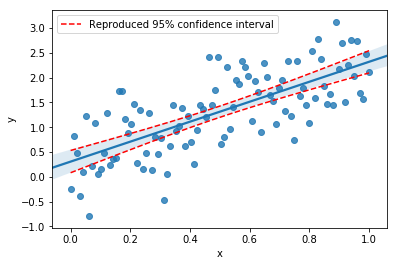

In [15]:
# Standard error of f
x_axis = np.linspace(0, 1, 1000)
f_se = np.sqrt(yvar/m*(1 + (x_axis - xmean)**2/xvar))
f_l = alpha + beta * x_axis - t * f_se
f_u = alpha + beta * x_axis + t * f_se

# Plot
plt.plot(x_axis, f_l, 'r--')
plt.plot(x_axis, f_u, 'r--', label='Reproduced 95% confidence interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot using seaborn
seaborn.regplot(x, y);

Let's understand the quantities $t$ and $P>|t|$ which are quoted for both $\hat{\alpha}$ and $\hat{\beta}$ in the regression summary above. Consider the following null hypothesis: $\beta=0$. In other words, we assume that the true population value of $\beta$ is zero. Given this assumption, we can compute a concrete $t$-value for $\hat{\beta}$: $t=\hat{\beta}/s_{\hat{\beta}}$. Futhermore, we can calculate the probability of observing a value greater than $|t|$, given the null hypothesis:

In [16]:
tval_beta = beta/beta_se
pval_beta = 2*stats.t.cdf(-abs(tval_beta), m - 2)

print("statsmodels beta t-value = {0}".format(model.tvalues[1]))
print("Reproduced  beta t-value = {0}".format(tval_beta))
print("")
print("statsmodels beta p-value = {0}".format(model.pvalues[1]))
print("Reproduced  beta p-value = {0}".format(pval_beta))

statsmodels beta t-value = 10.3055698889
Reproduced  beta t-value = 10.3055698889

statsmodels beta p-value = 2.63092577535e-17
Reproduced  beta p-value = 2.63092577535e-17


We can do the same for $\hat{\alpha}$:

In [17]:
tval_alpha = alpha/alpha_se
pval_alpha = 2*stats.t.cdf(-abs(tval_alpha), m - 2)

print("statsmodels beta t-value = {0}".format(model.tvalues[0]))
print("Reproduced  beta t-value = {0}".format(tval_alpha))
print("")
print("statsmodels beta p-value = {0}".format(model.pvalues[0]))
print("Reproduced  beta p-value = {0}".format(pval_alpha))

statsmodels beta t-value = 2.70991531654
Reproduced  beta t-value = 2.70991531654

statsmodels beta p-value = 0.00794562387443
Reproduced  beta p-value = 0.00794562387443


## Residual statistics

Let's reproduce some of the statistics around the residuals here.
We've covered [skewness](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/skewtest.ipynb), [kurtosis](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/kurtosistest.ipynb), and [Jarque-Bera](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/jarque_bera.ipynb) in other notebooks.

In [18]:
jb_val, jb_p = stats.jarque_bera(e)

print("Skewness         = {0}".format(stats.skew(e)))
print("Kurtosis         = {0}".format(stats.kurtosis(e) + 3))
print("Jarque-Bera (JB) = {0}".format(jb_val))
print("Prob(JB)         = {0}".format(jb_p))

Skewness         = 0.0350869362001
Kurtosis         = 2.35646285462
Jarque-Bera (JB) = 1.74610179106
Prob(JB)         = 0.417675319649


Note that Prob(JB) is measuring the probability of obtaining a JB value more than what we get from our sample, under the null hypothesis that the residual population is normally distributed. As discussed here [Jarque-Bera](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/jarque_bera.ipynb), the implementation of JB actually uses the $\chi^2_2$ distribution, which is only a good approximation for large samples ($m \gtrsim 2000$):

In [19]:
1 - stats.chi2.cdf(jb_val, 2)

0.41767531964923776